## Random Forests
1. Create subsets of data
2. Train a classification tree for each subset
3. All trees combine to make a vote for the final prediction

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

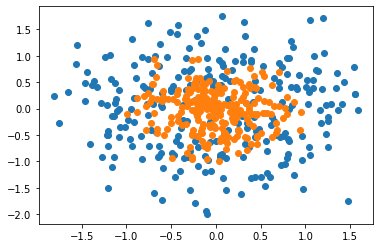

In [34]:
X,y = make_circles(n_samples=500, factor=0.1, noise = 0.4) # noise is 0.5 instead of 0.4 on javier's
plt.scatter(X[y==0,0],X[y==0,1], label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], label='class 1')
plt.show()

In [35]:
# create a classification tree with max_depth = 2. This will be bad
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

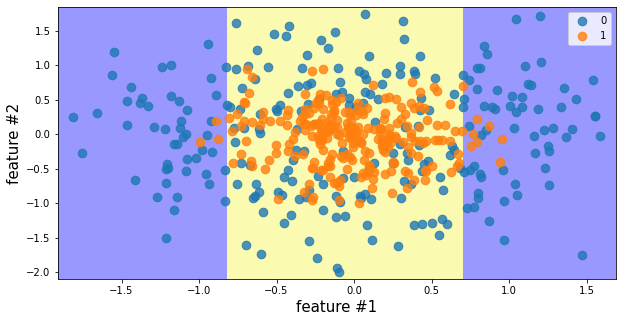

In [36]:
draw_classification_regions(X,y,tree_clf)

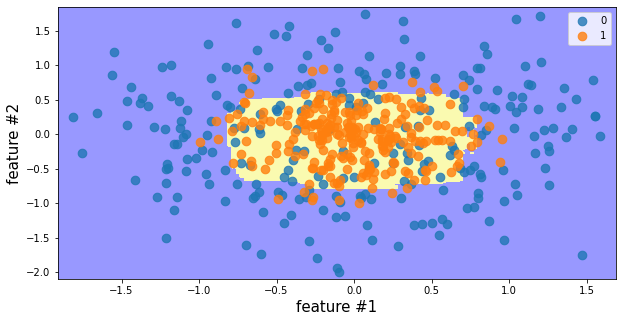

In [37]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators = 300, max_depth = 3) # n_estimators = number of subtrees
rf_clf.fit(X,y)
draw_classification_regions(X,y,rf_clf)

## Trees and Random Forest for regression problems
- note: linear regression is sensitive to outliers

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

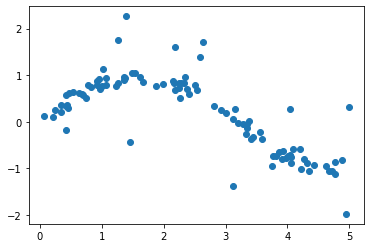

In [42]:
# toy example
# A 1D regression with decision tree

x = 5 * np.random.rand(100,1)
y = np.sin(x) + 0.1*np.random.randn(100,1) # y = sin(x) + random noise
y[::5] += 3 * (0.5 - np.random.rand(20,1)) # add outliers
plt.scatter(x,y)



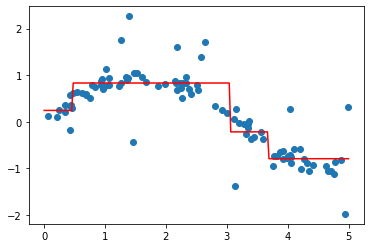

In [53]:
# tree
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)
# plot
x_plot = np.linspace(0,5,200).reshape(200,1)
y_plot = tree_reg.predict(x_plot)
plt.scatter(x,y)
plt.plot(x_plot,y_plot, color='red')

C:\Users\Derrick\AppData\Local\Temp\ipykernel_10332\1597297312.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x,y)


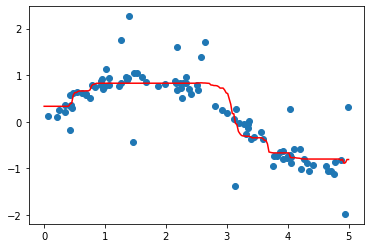

In [56]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=2)

rf_reg.fit(x,y)
# plot
x_plot = np.linspace(0,5,200).reshape(200,1)
y_plot = rf_reg.predict(x_plot)
plt.scatter(x,y)
plt.plot(x_plot,y_plot, color='red')

# Javier's Custom Function.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()